In [1]:
from __future__ import print_function
from __future__ import division
from __future__ import absolute_import
from __future__ import unicode_literals

import os
import sys

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# Introduction

On fait des plots sur les runs

In [2]:
from problem.workflow import print

# Data

In [3]:
from problem.mnist import load_data

In [4]:
X, y = load_data()

downloading /home/tao/vestrade/datawarehouse/train-images-idx3-ubyte.gz...Done.
downloading /home/tao/vestrade/datawarehouse/train-labels-idx1-ubyte.gz...Done.
downloading /home/tao/vestrade/datawarehouse/t10k-images-idx3-ubyte.gz...Done.
downloading /home/tao/vestrade/datawarehouse/t10k-labels-idx1-ubyte.gz...Done.


# Load models

In [5]:
from problem.mnist import get_save_directory
from problem.mnist import preprocessing
from problem.mnist import skew
from problem.mnist import tangent
from main import get_data_shape

In [6]:
def load_models(get_model, *args, **kwargs):
    models = []
    n_features, n_classes = get_data_shape('mnist')
    for i in range(5):
        model = get_model(*args, n_features=n_features, n_classes=n_classes, **kwargs)
        save_directory = get_save_directory()
        model_name = '{}-{}'.format(model.get_name(), i)
        path = os.path.join(save_directory, model_name)
        model.load(path)
        models.append(model)
    return models

In [7]:
from myNN import get_model as get_model_NN
from myNNDA import get_model as get_model_NNDA
from myTP import get_model as get_model_TP
from myPAN import get_model as get_model_PAN


# Test submission

In [8]:
from problem.mnist import test_submission


In [9]:
def get_mean_std(df_list):
    z = df_list[0]['z']
    acc = np.concatenate([df['accuracy'].values.reshape(-1, 1) for df in df_list], axis=1)
    mean_acc = np.mean(acc, axis=1)
    std_acc = np.std(acc, axis=1)
    return mean_acc, std_acc

In [10]:
# z_list = list(range(-50, 51, 10)) + list(range(-5, 6, 1))
# z_list = sorted(z_list)
z_list = np.linspace(-10, 10, num=20)


In [13]:
NN_models = load_models(get_model_NN, preprocessing=preprocessing)
df_list = test_submission(NN_models, X, y, z_list=z_list)
NN_mean_acc, NN_std_acc = get_mean_std(df_list)


2017-11-21 19:27:22 testing model 1/5
2017-11-21 19:28:15 testing model 2/5
2017-11-21 19:28:55 testing model 3/5
2017-11-21 19:29:35 testing model 4/5
2017-11-21 19:30:14 testing model 5/5
2017-11-21 19:30:54 Done.


In [14]:
NNDA_models = load_models(get_model_NNDA, preprocessing=preprocessing, skew=skew, width=5, )
df_list = test_submission(NNDA_models, X, y, z_list=z_list)
NNDA_mean_acc, NNDA_std_acc = get_mean_std(df_list)


2017-11-21 19:30:54 testing model 1/5
2017-11-21 19:31:33 testing model 2/5
2017-11-21 19:32:11 testing model 3/5
2017-11-21 19:32:50 testing model 4/5
2017-11-21 19:33:29 testing model 5/5
2017-11-21 19:34:08 Done.


In [15]:
TP_models = load_models(get_model_TP, preprocessing=preprocessing, tangent=tangent, trade_off=1.0, )
df_list = test_submission(TP_models, X, y, z_list=z_list)
TP_mean_acc, TP_std_acc = get_mean_std(df_list)


2017-11-21 19:34:08 testing model 1/5
2017-11-21 19:34:47 testing model 2/5
2017-11-21 19:35:26 testing model 3/5
2017-11-21 19:36:05 testing model 4/5
2017-11-21 19:36:45 testing model 5/5
2017-11-21 19:37:24 Done.


In [12]:
PAN_models = load_models(get_model_PAN, preprocessing=preprocessing, skew=skew, width=5, trade_off=1.0)
df_list = test_submission(PAN_models, X, y, z_list=z_list)
PAN_mean_acc, PAN_std_acc = get_mean_std(df_list)


INFO:tensorflow:Restoring parameters from /data/titanic_3/users/vestrade/savings/mnist/PAN_AGNO-3x120-3x120-0.001-1.0-5-Adam-SGD-SGD-0/weights.ckpt
INFO:tensorflow:Restoring parameters from /data/titanic_3/users/vestrade/savings/mnist/PAN_AGNO-3x120-3x120-0.001-1.0-5-Adam-SGD-SGD-1/weights.ckpt
INFO:tensorflow:Restoring parameters from /data/titanic_3/users/vestrade/savings/mnist/PAN_AGNO-3x120-3x120-0.001-1.0-5-Adam-SGD-SGD-2/weights.ckpt
INFO:tensorflow:Restoring parameters from /data/titanic_3/users/vestrade/savings/mnist/PAN_AGNO-3x120-3x120-0.001-1.0-5-Adam-SGD-SGD-3/weights.ckpt
INFO:tensorflow:Restoring parameters from /data/titanic_3/users/vestrade/savings/mnist/PAN_AGNO-3x120-3x120-0.001-1.0-5-Adam-SGD-SGD-4/weights.ckpt
2017-11-21 19:24:01 testing model 1/5
2017-11-21 19:24:41 testing model 2/5
2017-11-21 19:25:22 testing model 3/5
2017-11-21 19:26:02 testing model 4/5
2017-11-21 19:26:42 testing model 5/5
2017-11-21 19:27:22 Done.


# Plot


- What about confusion matrices ???


In [18]:
sns.set()
sns.set_context("poster")


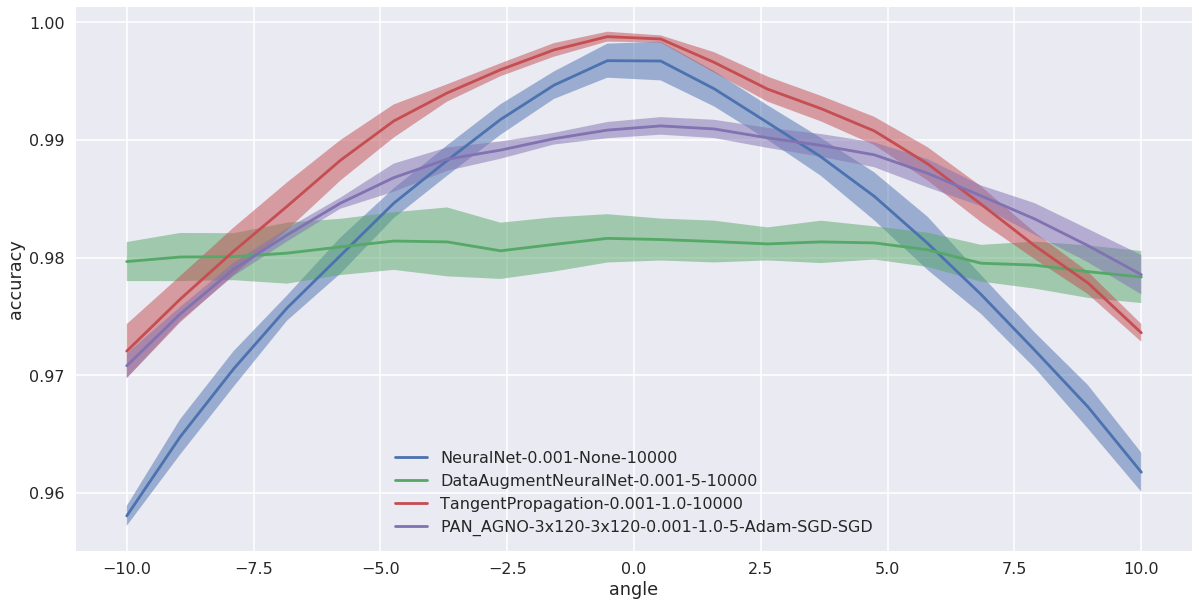

In [20]:
z = z_list

plt.figure(figsize=(20,10))

plt.plot(z, NN_mean_acc, label=NN_models[0].get_name())
plt.fill_between(z, NN_mean_acc+NN_std_acc, NN_mean_acc-NN_std_acc, alpha=0.5)

plt.plot(z, NNDA_mean_acc, label=NNDA_models[0].get_name())
plt.fill_between(z, NNDA_mean_acc+NNDA_std_acc, NNDA_mean_acc-NNDA_std_acc, alpha=0.5)

plt.plot(z, TP_mean_acc, label=TP_models[0].get_name())
plt.fill_between(z, TP_mean_acc+TP_std_acc, TP_mean_acc-TP_std_acc, alpha=0.5)

plt.plot(z, PAN_mean_acc, label=PAN_models[0].get_name())
plt.fill_between(z, PAN_mean_acc+PAN_std_acc, PAN_mean_acc-PAN_std_acc, alpha=0.5)

plt.xlabel('angle')
plt.ylabel('accuracy')
plt.legend()
plt.show()


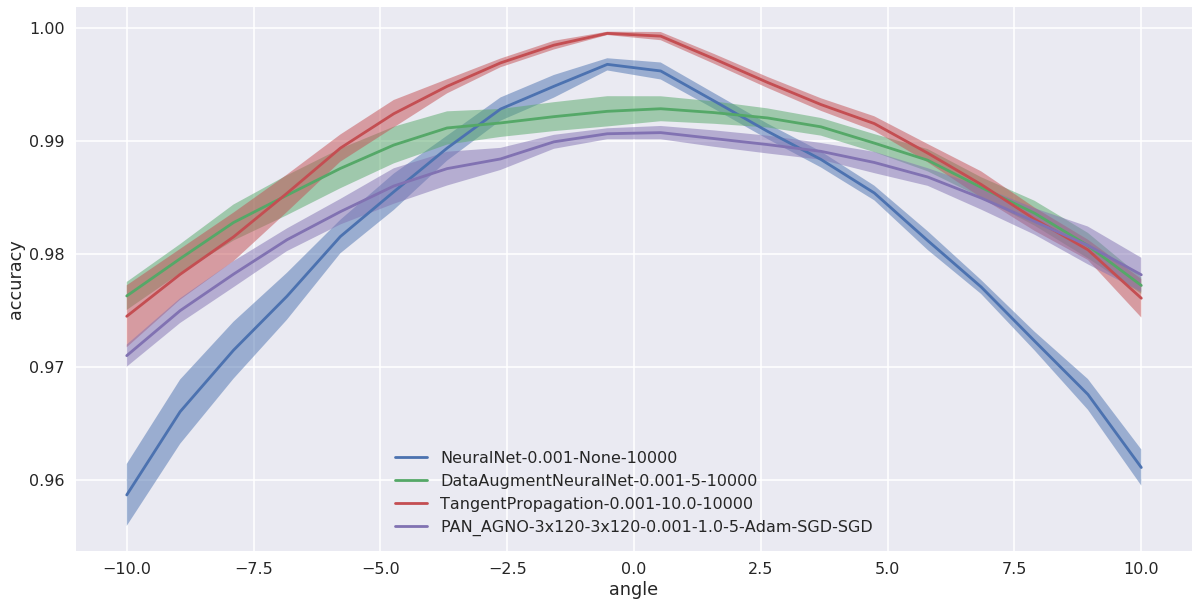

In [16]:
z = z_list

plt.figure(figsize=(20,10))

plt.plot(z, NN_mean_acc, label=NN_models[0].get_name())
plt.fill_between(z, NN_mean_acc+NN_std_acc, NN_mean_acc-NN_std_acc, alpha=0.5)

plt.plot(z, NNDA_mean_acc, label=NNDA_models[0].get_name())
plt.fill_between(z, NNDA_mean_acc+NNDA_std_acc, NNDA_mean_acc-NNDA_std_acc, alpha=0.5)

plt.plot(z, TP_mean_acc, label=TP_models[0].get_name())
plt.fill_between(z, TP_mean_acc+TP_std_acc, TP_mean_acc-TP_std_acc, alpha=0.5)

plt.plot(z, PAN_mean_acc, label=PAN_models[0].get_name())
plt.fill_between(z, PAN_mean_acc+PAN_std_acc, PAN_mean_acc-PAN_std_acc, alpha=0.5)

plt.xlabel('angle')
plt.ylabel('accuracy')
plt.legend()
plt.show()


# Playground

In [17]:
# i = 0
# m = models[i]
# cv_iter = get_cv_iter(X, y)
# idx_dev, idx_valid = cv_iter[i]
# X_test = X[idx_valid]
# y_test = y[idx_valid]
# acc = accuracy_score(y_test, m.predict(X_test))

# print(acc)


In [18]:
# XX = skew(X_test, z=80)
# y_pred = m.predict(XX)
# acc = accuracy_score(y_test, m.predict(XX))
# print(acc)

# i = np.random.randint(0, XX.shape[0])
# plt.imshow(XX[i].reshape(28,28))

# plt.title('label = {}<->truth = {}'.format(y_pred[i], y_test[i]))
# plt.show()

# plt.imshow(X_test[i].reshape(28,28))
# plt.show()


In [19]:
# X_test.shape

In [20]:
# from myNNDA import data_augment

In [21]:
# XX = X[:200]
# yy = y[:200]
# XX2, yy, _ = data_augment(XX, yy, None)

In [22]:
# i = 67
# x = XX2[i].reshape(28, 28)
# plt.imshow(x, cmap='Greys')
# plt.title('skewed')
# plt.show()
# x = XX[i].reshape(28, 28)
# plt.imshow(x, cmap='Greys')
# plt.title('original')
# plt.show()